In [104]:
!pip install japanize_matplotlib

  Using cached japanize-matplotlib-1.1.3.tar.gz (4.1 MB)
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for japanize_matplotlib, since package 'wheel' is not installed.
  Running setup.py install for japanize_matplotlib ... done
You should consider upgrading via the '/home/tsuyoshi_miyagi/.pyenv/versions/3.7.13/bin/python3.7 -m pip install --upgrade pip' command.


In [141]:
import os
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
from statsmodels.tsa.ar_model import AutoReg

sns.set_style('whitegrid')
sns.set(font="IPAexGothic")
%matplotlib inline

In [63]:
# 現在のワーキングディレクトリを取得
os.getcwd()

'/home/tsuyoshi_miyagi/wsl_training/31_時系列分析/02_講義資料/03_data'

In [64]:
data_folder = '../03_data'
os.chdir(data_folder)

In [65]:
os.getcwd()

'/home/tsuyoshi_miyagi/wsl_training/31_時系列分析/02_講義資料/03_data'

In [137]:
file = '日経平均20150105-20150731.csv'
nikkei = pd.read_csv(file, parse_dates=["日付"])
print(nikkei.shape)
nikkei.head()

(143, 2)


,日付,終値
0,2015-01-05,17409
1,2015-01-06,16883
2,2015-01-07,16885
3,2015-01-08,17167
4,2015-01-09,17198


In [130]:
tmp = nikkei.copy()
tmp["log"] = np.log(tmp["終値"])
logdiff = np.diff(tmp["log"])
tmp["pct_change"] = tmp["終値"].pct_change()
tmp = tmp.iloc[1:, :]
tmp["logdiff"] = logdiff
tmp["経過日数"] = np.arange(1, len(tmp)+1)
tmp.head()

,日付,終値,log,pct_change,logdiff,経過日数
1,2015-01-06,16883,9.734062,-0.030214,-0.030680,1
2,2015-01-07,16885,9.734181,0.000118,0.000118,2
3,2015-01-08,17167,9.750744,0.016701,0.016563,3
4,2015-01-09,17198,9.752548,0.001806,0.001804,4
5,2015-01-13,17088,9.746132,-0.006396,-0.006417,5


In [124]:
# tmp["lag"] = tmp["終値"].shift(1)
# # tmp["sbm"] = tmp["終値"] - tmp["lag"]
# # tmp["sbm_log"] = np.log(tmp["sbm"])
# tmp["log_sbn"] = 0.0
# for i in range(len(tmp)-1):
#     tmp["log_sbn"][i+2] = tmp["log"][i+1] - tmp["log"][i+2]
# tmp.head()

/home/tsuyoshi_miyagi/.pyenv/versions/3.7.13/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,日付,終値,log,pct_change,logdiff,経過日数,lag,sbm,sbm_log,log_sbn
1,2015-01-06,16883,9.734062,-0.030214,-0.030680,1,NaN,NaN,NaN,0.000000
2,2015-01-07,16885,9.734181,0.000118,0.000118,2,16883.0,16875.265938,0.693147,-0.000118
3,2015-01-08,17167,9.750744,0.016701,0.016563,3,16885.0,17157.265819,5.641907,-0.016563
4,2015-01-09,17198,9.752548,0.001806,0.001804,4,17167.0,17188.249256,3.433987,-0.001804
5,2015-01-13,17088,9.746132,-0.006396,-0.006417,5,17198.0,17078.247452,NaN,0.006417


In [138]:
logdiff = np.diff(np.log(nikkei["終値"]))
lag = nikkei["終値"].shift(10)
nikkei = nikkei.iloc[1:, :]
nikkei["対数差収益率"] = logdiff
nikkei["lag"] = lag
nikkei["経過日数"] = np.arange(1, len(nikkei)+1)
nikkei.head()

,日付,終値,対数差収益率,lag,経過日数
1,2015-01-06,16883,-0.030680,NaN,1
2,2015-01-07,16885,0.000118,NaN,2
3,2015-01-08,17167,0.016563,NaN,3
4,2015-01-09,17198,0.001804,NaN,4
5,2015-01-13,17088,-0.006417,NaN,5


In [139]:
nikkei = nikkei.iloc[9:, :]
nikkei.head()

,日付,終値,対数差収益率,lag,経過日数
10,2015-01-20,17366,0.020478,17409.0,10
11,2015-01-21,17280,-0.004965,16883.0,11
12,2015-01-22,17329,0.002832,16885.0,12
13,2015-01-23,17512,0.010505,17167.0,13
14,2015-01-26,17469,-0.002458,17198.0,14


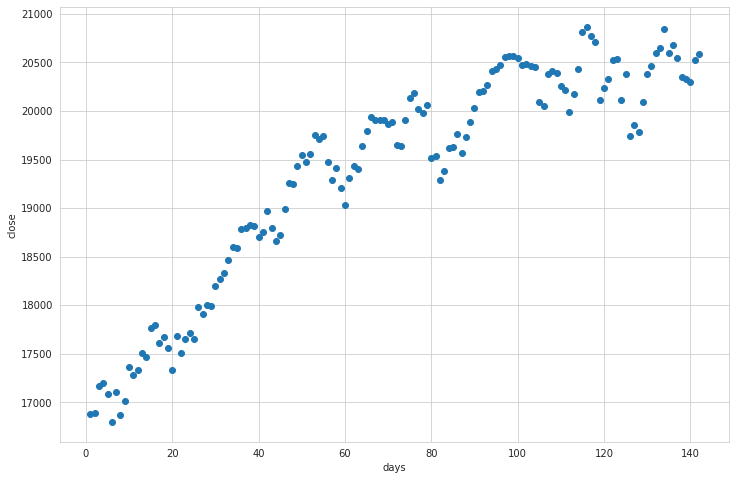

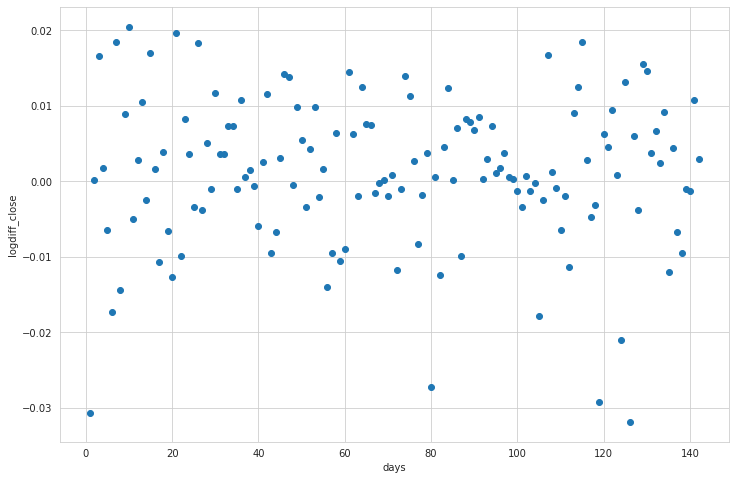

In [132]:
plt.figure(figsize=(12, 8))
plt.scatter(nikkei["経過日数"], nikkei["終値"])
plt.xlabel("days")
plt.ylabel("close")
plt.show()
plt.figure(figsize=(12, 8))
plt.scatter(nikkei["経過日数"], nikkei["対数差収益率"])
plt.xlabel("days")
plt.ylabel("logdiff_close")
plt.show()

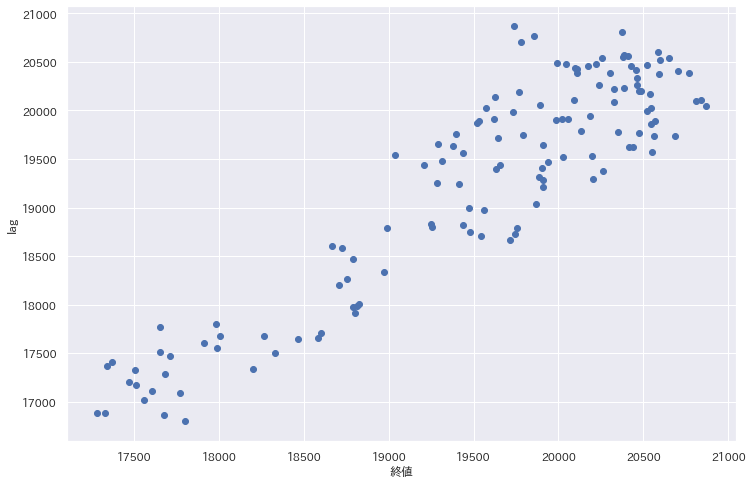

In [142]:
plt.figure(figsize=(12, 8))
plt.scatter(nikkei["終値"], nikkei["lag"])
plt.xlabel("終値")
plt.ylabel("lag")
plt.show()

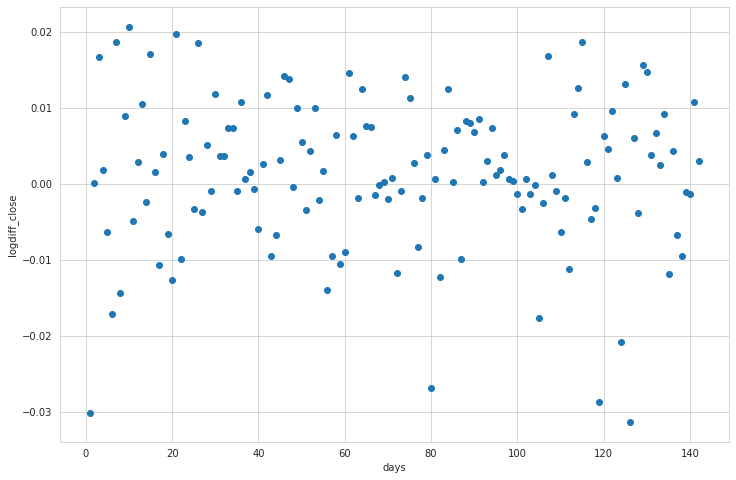

In [88]:
plt.figure(figsize=(12, 8))
plt.scatter(tmp["経過日数"], tmp["pct_change"])
plt.xlabel("days")
plt.ylabel("logdiff_close")
plt.show()

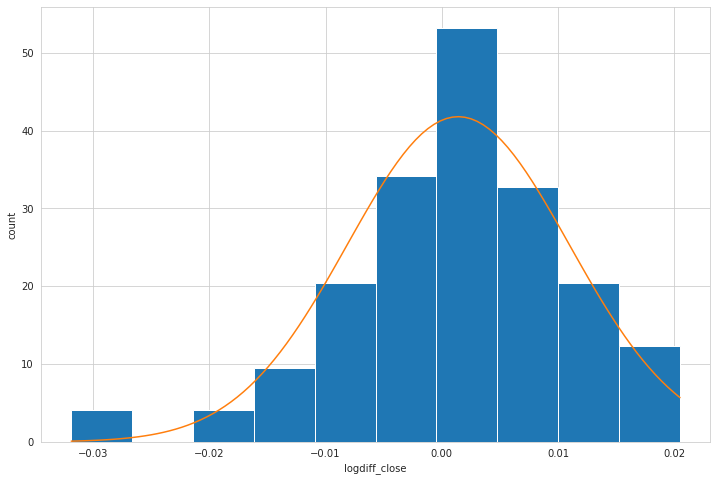

In [36]:
x = np.linspace(np.min(logdiff), np.max(logdiff), 100)
plt.figure(figsize=(12, 8))
plt.hist(nikkei["対数差収益率"], density=True)
plt.plot(x, norm.pdf(x, np.mean(nikkei["対数差収益率"]), np.std(nikkei["対数差収益率"])))
plt.xlabel("logdiff_close")
plt.ylabel("count")
plt.show()

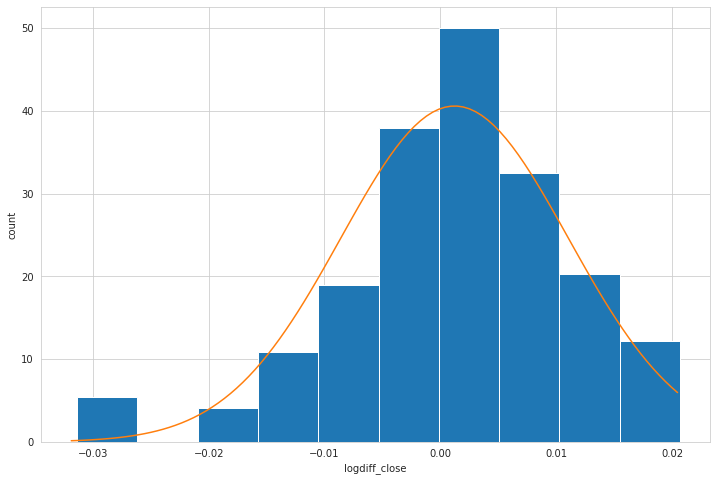

In [89]:
x = np.linspace(np.min(logdiff), np.max(logdiff), 100)
plt.figure(figsize=(12, 8))
plt.hist(tmp["pct_change"], density=True)
plt.plot(x, norm.pdf(x, np.mean(tmp["pct_change"]), np.std(tmp["pct_change"])))
plt.xlabel("logdiff_close")
plt.ylabel("count")
plt.show()

In [34]:
ar_10 = AutoReg(nikkei["対数差収益率"].values, lags=10, old_names=False).fit()
ar_10.predict(start=142, end=142)

array([0.00274457])

In [91]:
tmp_ar_10 = AutoReg(tmp["pct_change"].values, lags=10, old_names=False).fit()
tmp_ar_10.predict(start=142, end=142)

array([0.00349569])

In [49]:
start = 50
pred_seq = np.arange(start, len(nikkei))
preds = np.empty_like(pred_seq, dtype=float)

for i, j in enumerate(pred_seq):
    preds[i] = AutoReg(nikkei.loc[(j-start+1):j, "対数差収益率"].values, lags=10, old_names=False).fit().predict(start=start, end=start)

preds

array([-3.07396238e-04,  1.27909229e-03,  1.82430027e-03,  1.39538792e-05,
       -2.52954607e-03, -5.74843462e-03,  3.44212399e-03,  8.02741998e-03,
       -7.65638932e-04,  7.15576691e-03,  4.34073733e-03,  9.22665359e-04,
        7.37376686e-03,  6.76637013e-03,  1.18119699e-02,  1.39882635e-02,
        6.76070852e-03,  4.58176426e-03,  7.30052552e-03,  2.74146596e-03,
       -5.43333094e-03,  3.77289487e-03, -6.01913498e-03,  4.78403186e-03,
        1.39784031e-04,  1.83166665e-03,  4.27365468e-03,  2.74635402e-03,
        1.13438902e-02,  3.69373074e-03, -1.08556993e-02,  1.69666018e-02,
       -7.74881476e-03,  8.29921780e-03,  9.98169869e-04,  1.30929587e-02,
        1.08915733e-02,  3.68620997e-03, -1.31935349e-03, -5.21701388e-03,
        2.54931101e-03, -3.57455144e-03,  1.93367115e-03, -5.14728757e-03,
       -2.15641104e-03, -3.93594284e-03, -9.51190549e-04,  1.20243009e-03,
        1.11121800e-03,  9.47147894e-04,  1.43552581e-03,  3.05553652e-04,
        7.71147850e-04,  

In [92]:
start = 50
pred_seq = np.arange(start, len(nikkei))
# preds = np.empty_like(pred_seq, dtype=float)
preds2 = []

for i, j in enumerate(pred_seq):
    preds2.append(AutoReg(nikkei.loc[(j-start+1):j, "対数差収益率"].values, lags=10, old_names=False).fit().predict(start=start, end=start))

preds2

[array([0.00579087]),
 array([0.0072767]),
 array([0.0018243]),
 array([1.39538792e-05]),
 array([-0.00252955]),
 array([-0.00574843]),
 array([0.00344212]),
 array([0.00802742]),
 array([-0.00076564]),
 array([0.00715577]),
 array([0.00434074]),
 array([0.00092267]),
 array([0.00737377]),
 array([0.00676637]),
 array([0.01181197]),
 array([0.01398826]),
 array([0.00676071]),
 array([0.00458176]),
 array([0.00730053]),
 array([0.00274147]),
 array([-0.00543333]),
 array([0.00377289]),
 array([-0.00601913]),
 array([0.00478403]),
 array([0.00013978]),
 array([0.00183167]),
 array([0.00427365]),
 array([0.00274635]),
 array([0.01134389]),
 array([0.00369373]),
 array([-0.0108557]),
 array([0.0169666]),
 array([-0.00774881]),
 array([0.00829922]),
 array([0.00099817]),
 array([0.01309296]),
 array([0.01089157]),
 array([0.00368621]),
 array([-0.00131935]),
 array([-0.00521701]),
 array([0.00254931]),
 array([-0.00357455]),
 array([0.00193367]),
 array([-0.00514729]),
 array([-0.00215641])

In [52]:
np.arange(len(ans))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91])

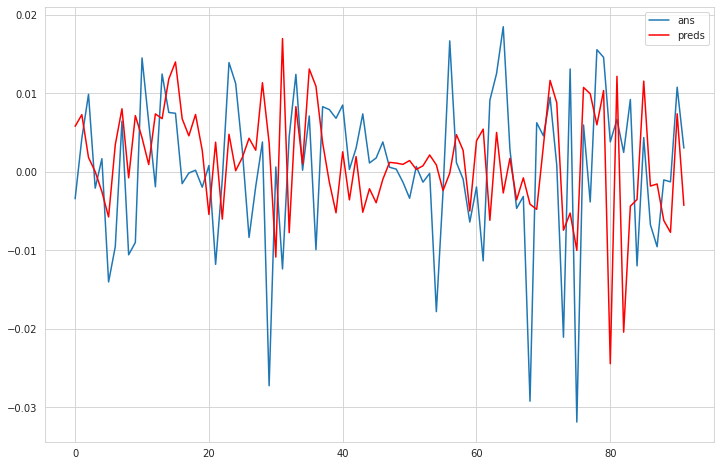

In [94]:
ans = nikkei.loc[start+1:, "対数差収益率"]
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(ans)), ans, label="ans")
plt.plot(np.arange(len(preds2)), preds2, label="preds", c="red")
plt.legend()
plt.show()

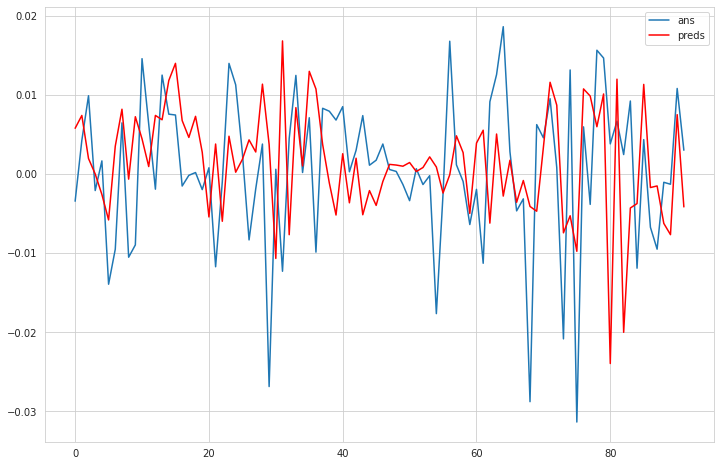

In [97]:
ans = tmp.loc[start+1:, "pct_change"]
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(ans)), ans, label="ans")
plt.plot(np.arange(len(preds)), preds, label="preds", c="red")
plt.legend()
plt.show()

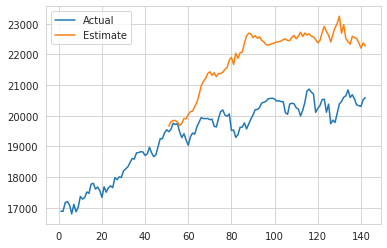

In [98]:
# 原系列のプロット
plt.plot(nikkei['終値'], label='Actual')

# 逆変換
preds_exp = np.exp(preds)
preds_close = [0]*(142-start)
preds_close[0] = preds_exp[0]*nikkei.loc[start, '終値']
for i in range(1, len(preds)):
    preds_close[i] = preds_exp[i]*preds_close[i-1]
plt.plot([start+1+i for i in range(142-start)], preds_close, label='Estimate')

plt.legend()
plt.show()

In [103]:
close = [np.exp(nikkei.loc[start+1:, '対数差収益率'])[start+1+i]*nikkei.loc[start+i, '終値'] for i in range(142-start)]
mse = np.square(np.array(close)-np.array(preds_close)).mean()**0.5
rmse = np.sqrt(mse)
rmse

141.7210557774451